Aim:
To implement a Siamese neural network comparing pairs of MNIST images using their learned difference vectors, enabling image similarity detection and pairwise comparison.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model 

In [1]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [19]:
img_A_inp = Input((28, 28), name='img_A_inp')
img_B_inp = Input((28, 28), name='img_B_inp') 


In [20]:
NUM_FILTERS = 64
cnn = Sequential([
    Reshape((28, 28, 1)),
    Conv2D(NUM_FILTERS, 3, 1, activation='relu'),
    Flatten(),
    Dense(64, activation='relu')
])

In [24]:
feature_vector_A = cnn(img_A_inp)
feature_vector_B = cnn(img_B_inp) 

In [25]:
difference_layer = tf.keras.layers.Subtract()([feature_vector_A, feature_vector_B]) 


In [26]:
dense = Dense(64, activation='relu' )(difference_layer)
output = Dense(1, activation='sigmoid' ) (dense) 

In [27]:
model = Model(inputs=[img_A_inp, img_B_inp], outputs=output)
model. summary () 


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ img_A_inp (InputLayer)    │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ img_B_inp (InputLayer)    │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, 64)             │      2,769,600 │ img_A_inp[0][0],       │
│                           │                        │                │ img_B_inp[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_5 (Subtract)     │ (None, 64)             │              0 │ sequential_4[2][0],    │
│                           │                        │                │ sequential_4[3][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          4,160 │ subtract_5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,773,825 (10.58 MB)

 Trainable params: 2,773,825 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
import numpy as np
random_indices = np.random.choice(X_train.shape[0], 100, replace=False)
X_train_sample, y_train_sample = X_train[random_indices], y_train[random_indices]
X_train_sample.shape, y_train_sample.shape 

((100, 28, 28), (100,))

In [29]:
def make_paired_dataset(X, y):
    X_pairs, y_pairs = [], []
    
    tuples = [(x1, y1) for x1, y1 in zip(X, y)]
    
    tuples = tuples[:50]
    
    for i in range(len(tuples)):
        for j in range(len(tuples)):
            img_A, label_A = tuples[i]
            img_B, label_B = tuples[j]
            
            new_label = int(label_A == label_B)
            
            X_pairs.append([img_A, img_B])
            y_pairs.append(new_label)
    
    X_pairs = np.array(X_pairs)
    y_pairs = np.array(y_pairs)
    
    return X_pairs, y_pairs

make_paired_dataset(X_train_sample, y_train_sample)

(array([[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0

In [30]:
X_train_pairs, y_train_pairs = make_paired_dataset(X_train_sample, y_train_sample)
X_train_pairs.shape, y_train_pairs.shape 

((2500, 2, 28, 28), (2500,))

In [33]:
random_indices = np.random.choice(X_test.shape[0], 15, replace=False)
X_test_sample, y_test_sample = X_test[random_indices], y_test[random_indices]
X_test_sample.shape, y_test_sample.shape 

((15, 28, 28), (15,))

In [35]:
X_test_pairs, y_test_pairs = make_paired_dataset(X_test_sample, y_test_sample)
X_test_pairs.shape, y_test_pairs.shape


((225, 2, 28, 28), (225,))

In [37]:
def contrastive_loss(y_true, y_pred, margin=1.0):
 
    positive_loss = y_true * tf.square(y_pred)
    
    negative_loss = (1 - y_true) * tf.square(tf.maximum(margin - y_pred, 0))
    
    total_loss = positive_loss + negative_loss
    
    return tf.reduce_mean(total_loss)


In [40]:
model.compile(loss=contrastive_loss, 
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , 
metrics=['accuracy']) 

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(patience=4)

model.fit(
    x=[X_train_pairs[:, 0, :, :], X_train_pairs[:, 1, :, :]], 
    y=y_train_pairs, 
    validation_data=(
        [X_test_pairs[:, 0, :, :], X_test_pairs[:, 1, :, :]], 
        y_test_pairs
    ),
    epochs=8,
    batch_size=28,
    callbacks=[earlystop]  
)


Epoch 1/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.2879 - loss: 0.2586 - val_accuracy: 0.1600 - val_loss: 0.1059
Epoch 2/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0931 - loss: 0.0891 - val_accuracy: 0.0889 - val_loss: 0.1001
Epoch 3/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0985 - loss: 0.1014 - val_accuracy: 0.0844 - val_loss: 0.0983
Epoch 4/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0788 - loss: 0.0831 - val_accuracy: 0.0800 - val_loss: 0.0915
Epoch 5/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0960 - loss: 0.0981 - val_accuracy: 0.0800 - val_loss: 0.0943
Epoch 6/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0705 - loss: 0.0760 - val_accuracy: 0.0933 - val_loss: 0.1054
Epoch 7/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0743 - loss: 0.0793 - val_accuracy: 0.0844 - val_loss: 0.1001
Epoch 8/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0721 - loss: 0.0758 - val_accuracy: 0.0889 - val_loss: 0.1047

In [54]:
img_A,img_B = X_test[0], X_test[18] 
label_A, label_B=y_test[0], y_test[18] 
label_A,label_B

(7, 3)

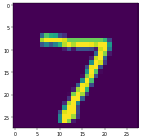

In [46]:
import matplotlib.pyplot as plt 
plt.figure(dpi=34) 
plt.imshow(img_A) 

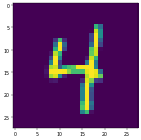

In [49]:
plt.figure(dpi=34) 
plt.imshow(img_B) 


In [50]:
model.predict([img_A.reshape((1, 28, 28)), 
               img_B.reshape((1, 28, 28))]).flatten()[0] > 0.5 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


True